<a href="https://colab.research.google.com/github/harold286/Harold_Hoyos/blob/main/Semana2/LimpiezaPandas/ejercicio%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Ejercicio: Limpieza usando pandas

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
# Cargar el dataset DailyDelhiClimateTrain.csv
data = pd.read_csv("DailyDelhiClimateTrain.csv", header = 0)
data.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [12]:
# Verificar las estadísticas generales del dataset
data.dtypes
data.count()
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


Valores máximos por columna:
date             2017-01-01
meantemp          38.714286
humidity              100.0
wind_speed            42.22
meanpressure    7679.333333
dtype: object

Valores mínimos por columna:
date            2013-01-01
meantemp               6.0
humidity         13.428571
wind_speed             0.0
meanpressure     -3.041667
dtype: object


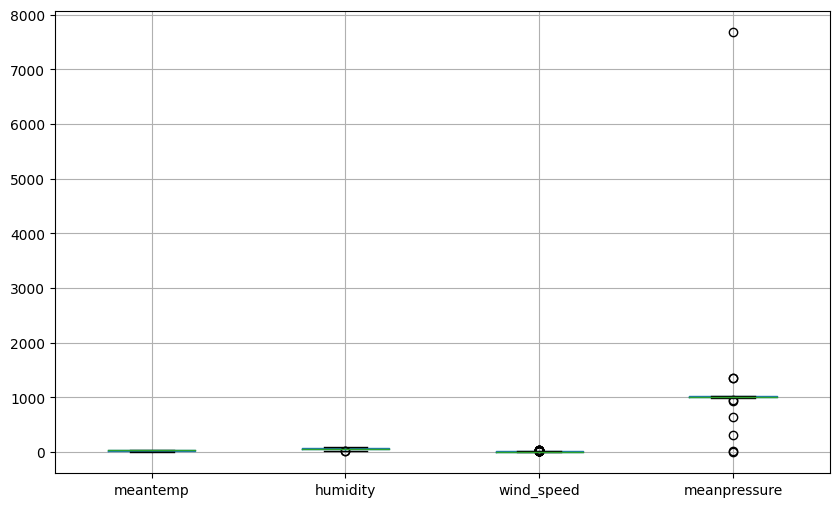

In [16]:
# Revisar la información, encuentre en los datos máximos y mínimos de las variables
# Valores máximos
print("Valores máximos por columna:")
print(data.max())

# Valores mínimos
print("\nValores mínimos por columna:")
print(data.min())

data.boxplot(figsize=(10, 6))
plt.show()

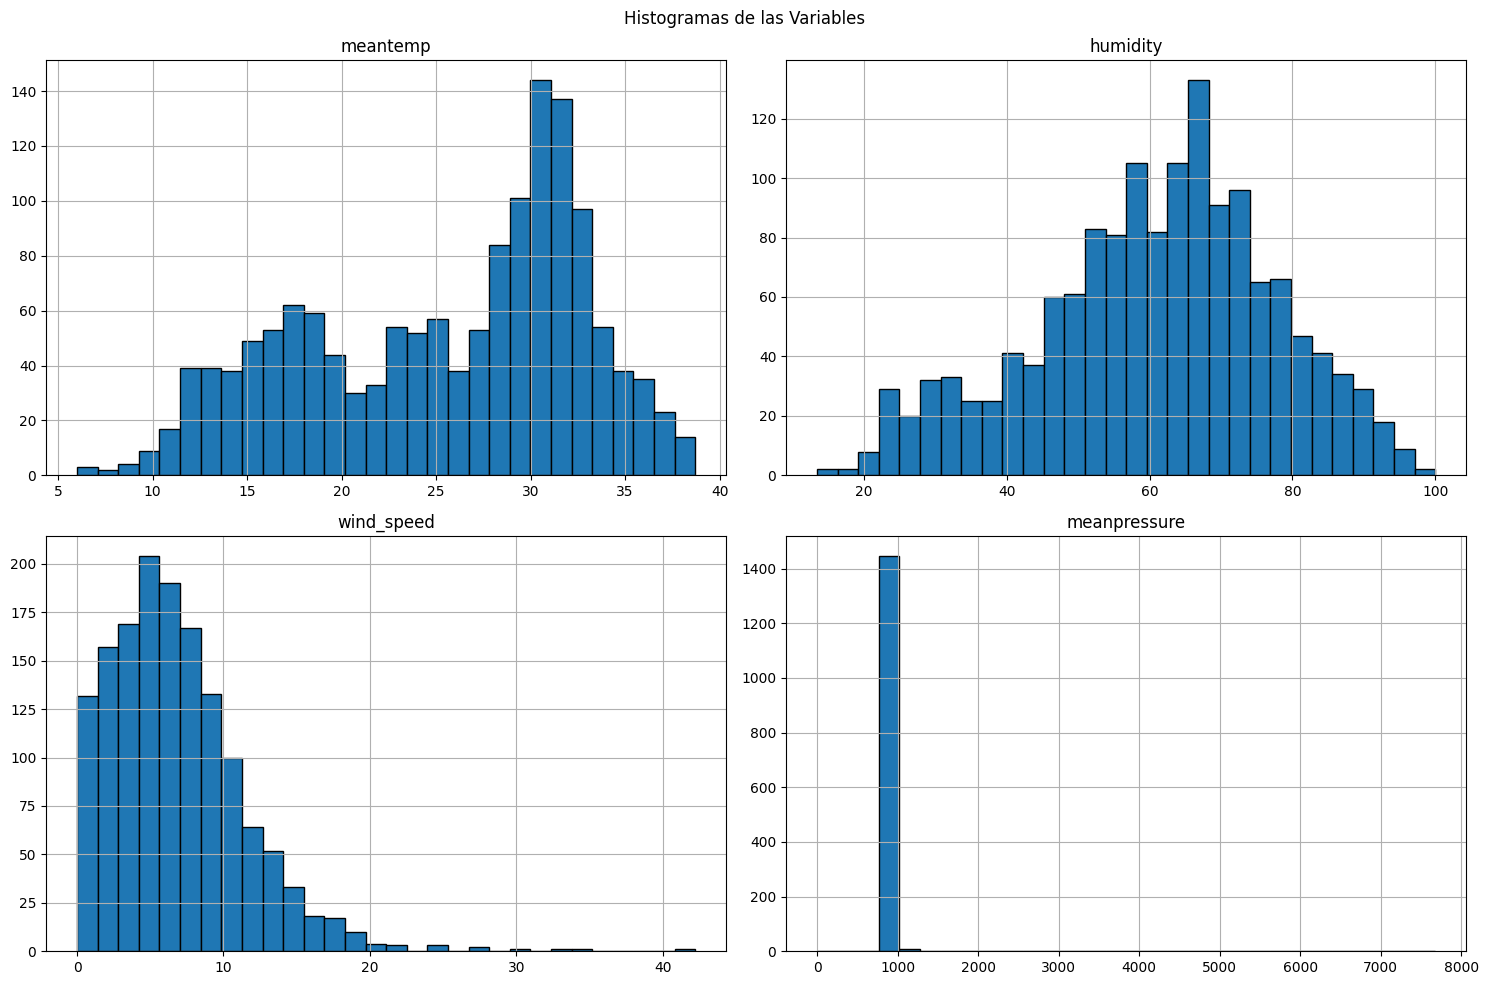

In [22]:
# Revisar si encuentra algo fuera de lo normal

# Graficar histogramas para cada columna numérica
data.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histogramas de las Variables')
plt.tight_layout()
plt.show()


In [24]:
# Eliminar las columnas meantemp, humidity y wind_speed. Mantenga la columna meanpressure
data = data.drop(columns=['meantemp', 'humidity', 'wind_speed'])

In [25]:
data = data[['meanpressure']]


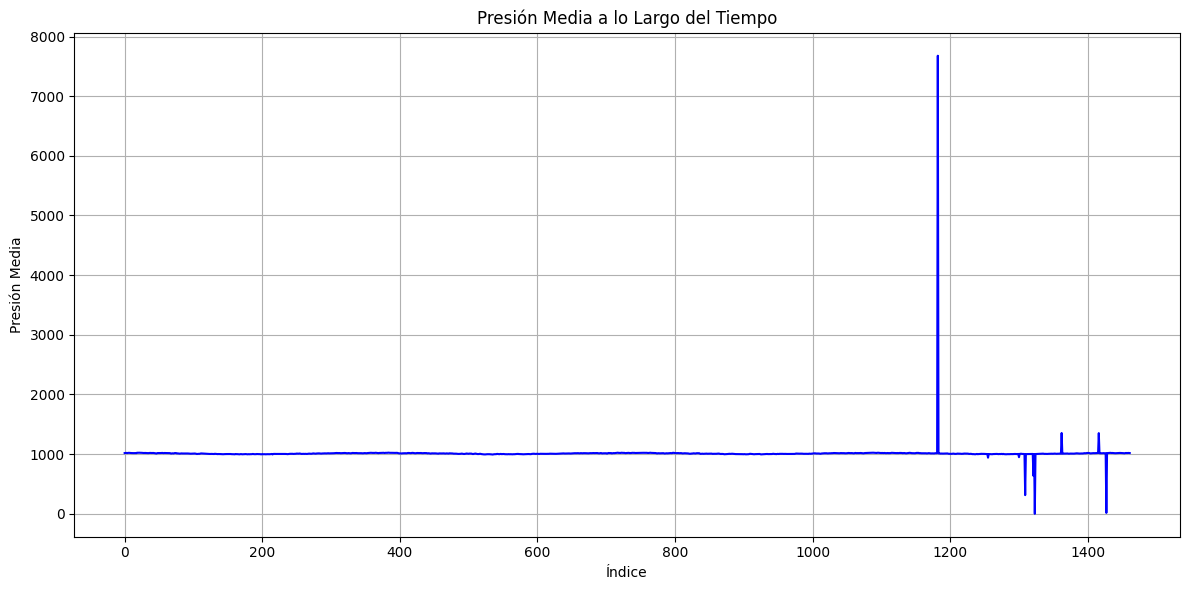

In [28]:
# Graficar los datos del campo meanpressure
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data.index, y='meanpressure', color='blue')
plt.title('Presión Media a lo Largo del Tiempo')
plt.xlabel('Índice')
plt.ylabel('Presión Media')
plt.grid(True)
plt.tight_layout()
plt.show()
# Qué puede decir de la gráfica?
# Hay algo atípico en esa respuesta temporal?


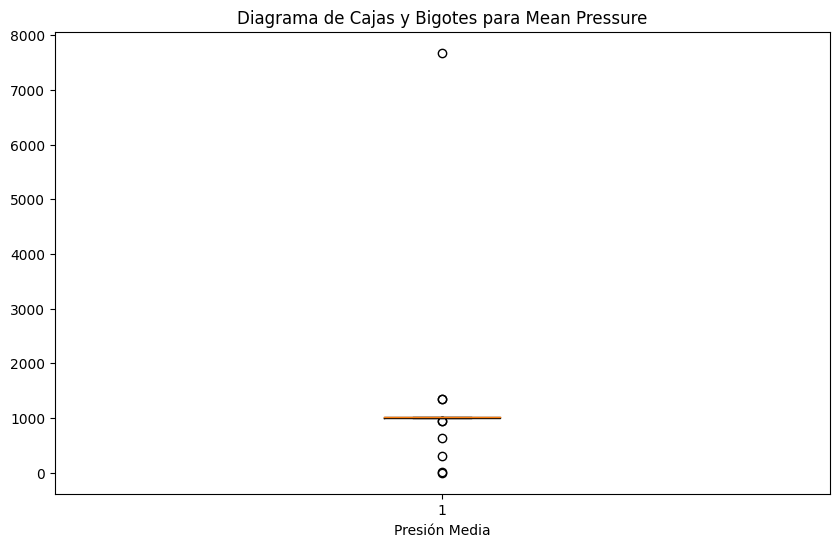

In [32]:
# Realice un diagrama de cajas y alambres para determinar visualmente si hay outliers

plt.figure(figsize=(10, 6))
plt.boxplot(data['meanpressure'] )
plt.title('Diagrama de Cajas y Bigotes para Mean Pressure')
plt.xlabel('Presión Media')
plt.show()

In [35]:
# Calcular el parámetro Zscore para la columna meanpressure
data['Zscore'] = stats.zscore(data['meanpressure'])

In [37]:
print(data.head())

   meanpressure    Zscore
0   1015.666667  0.025321
1   1017.800000  0.037162
2   1018.666667  0.041972
3   1017.166667  0.033647
4   1016.500000  0.029946


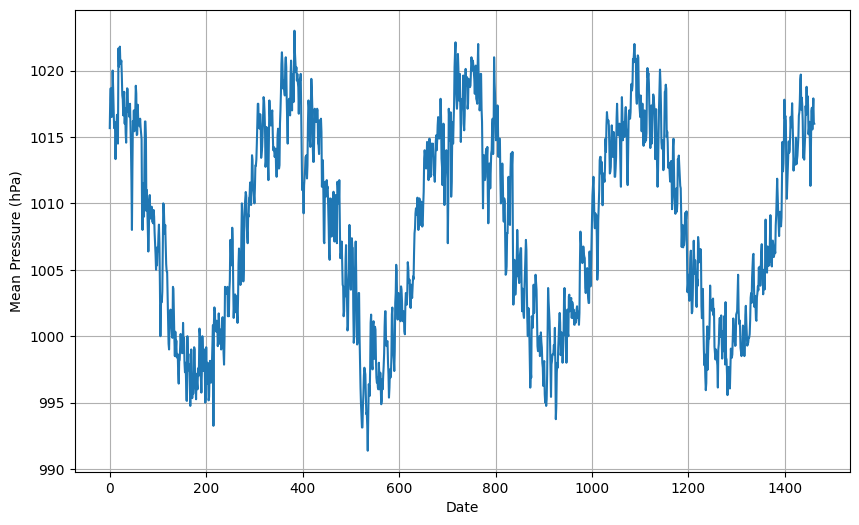

(count    1453.000000
 mean     1008.269018
 std         7.437835
 min       991.375000
 25%      1001.625000
 50%      1008.571429
 75%      1014.937500
 max      1023.000000
 Name: meanpressure, dtype: float64,
 1023.0,
 991.375)

In [49]:
# Variar el valor del humbral de Zscore para filtrar valores atípicos hasta que considere que la gráfica de la variable
#  meanpressure sea correcta

threshold = 0.25

filtered_data = data[(data['Zscore'].abs() <= threshold)]

plt.figure(figsize=(10,6))
plt.plot(filtered_data.index, filtered_data['meanpressure'])
plt.xlabel('Date')
plt.ylabel('Mean Pressure (hPa)')
plt.grid(True)
plt.show()

data_stats = filtered_data['meanpressure'].describe()

max_value_filtered = filtered_data['meanpressure'].max()
min_value_filtered = filtered_data['meanpressure'].min()

data_stats, max_value_filtered, min_value_filtered

In [44]:
# Para los datos sin outliers verificar nuevamente las estadísticas generales
data_stats = filtered_data['meanpressure'].describe()

max_value_filtered = filtered_data['meanpressure'].max()
min_value_filtered = filtered_data['meanpressure'].min()
data_stats, max_value_filtered, min_value_filtered
# Qué puede decir de los valores máximos y mínimos de los datos filtrados
#el valor max y min esta dentro de los valores tipicos

(count    1453.000000
 mean     1008.269018
 std         7.437835
 min       991.375000
 25%      1001.625000
 50%      1008.571429
 75%      1014.937500
 max      1023.000000
 Name: meanpressure, dtype: float64,
 1023.0,
 991.375)

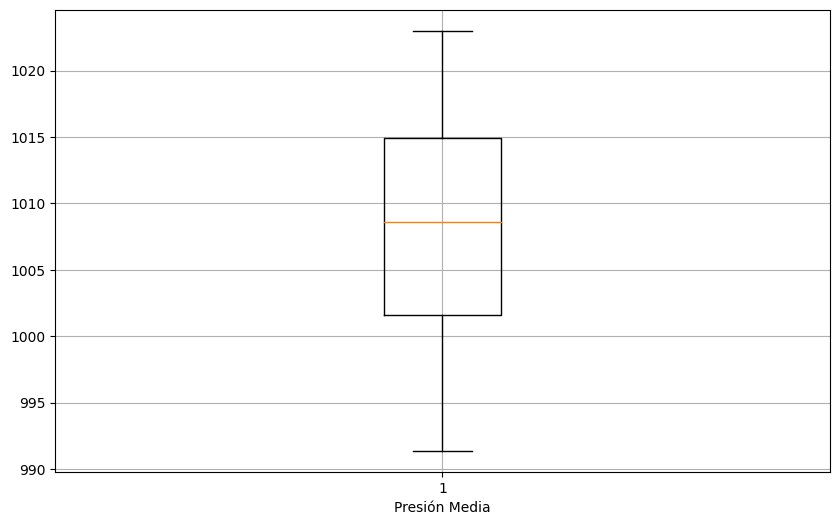

In [47]:
# Realice un diagrama de cajas y alambres para determinar visualmente si aún hay outliers

plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data['meanpressure'])
plt.xlabel('Presión Media')
plt.grid(True)
plt.show()
